In [3]:
import numpy as np

In [82]:
class Percetron(object):
    def __init__(self, learning_rate=0.001, n_iter=500):
        self.learning_rate = learning_rate
        self.n_iter = n_iter
    
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])  # 样本特征维度再增加1列，即偏置b
        self.errors_ = []                   # 记录每一轮误分类的样本数量
        
        for _ in range(self.n_iter):  # 更新多少次
            errors = 0
            for xi, target in zip(X, y):
                update = self.learning_rate * (target - self.predict(xi))#调用了predict()函数
                self.w_[1:] += update * xi
                self.w_[0] += update
                errors += int(update != 0.0)
                
            self.errors_.append(errors)
        return self
    
    def net_input(self, X):
        return np.dot(X, self.w_[1:]) + self.w_[0]  # wx+b
    
    def predict(self, X):
        return np.where(self.net_input(X) >= 0, 1, -1)  # 预测值，大于0则为1类，小于0则为-1类

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.colors import ListedColormap
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline

In [4]:
df = pd.read_csv('iris.data', header=None)

In [5]:
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [6]:
# 从中抽取两类花
y = df.iloc[0:100,4].values  # 自动转化为array类型

In [7]:
y

array(['Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versic

In [8]:
y = np.where(y == 'Iris-setosa', 1, -1)  # 转换为感知机支持的1，-1而分类问题

In [9]:
y

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

In [10]:
x = df.iloc[0:100, [0 ,2]].values

In [11]:
x[:5]

array([[ 5.1,  1.4],
       [ 4.9,  1.4],
       [ 4.7,  1.3],
       [ 4.6,  1.5],
       [ 5. ,  1.4]])

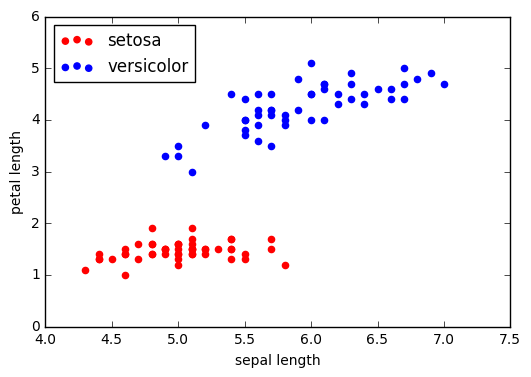

In [14]:
# 画散点图
# ax = plt.figure().add_subplot(111, projection = '3d')  
plt.scatter(x[:50, 0], x[:50, 1], color='red', marker='o', label='setosa')
plt.scatter(x[50:100, 0], x[50:100, 1], color='blue', label='versicolor')
plt.xlabel('sepal length')  
plt.ylabel('petal length')  
#plt.set_zlabel('petal length') 
plt.legend(loc='upper left')
plt.show()

In [15]:
ppn = Percetron(learning_rate=0.1, n_iter=10)

In [16]:
ppn.fit(x, y)

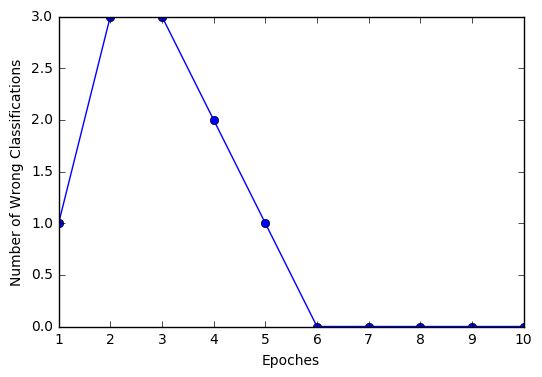

In [17]:
plt.plot(range(1, len(ppn.errors_)+1), ppn.errors_, marker='o')
plt.xlabel('Epoches')
plt.ylabel('Number of Wrong Classifications')
plt.show()

In [43]:
# 画分界线超平面
def plot_decision_region(X, y, classifier, resolution=0.02):
    markers=('s','x','o','^','v')
    colors=('red','blue','lightgreen','gray','cyan')
    cmap=ListedColormap(colors[:len(np.unique(y))])
     
    #plot the desicion surface
    x1_min,x1_max=X[:,0].min()-1,X[:,0].max()+1
    x2_min,x2_max=X[:,1].min()-1,X[:,1].max()+1  
    # x3_min,x3_max=X[:,2].min()-1,X[:,2].max()+1
     
    xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                        np.arange(x2_min,x2_max,resolution))
    Z=classifier.predict(np.array([xx1.ravel(),xx2.ravel()],).T)
    Z=Z.reshape(xx1.shape)
     
    plt.contour(xx1,xx2,Z,alpha=0.4,cmap=cmap)
    plt.xlim(xx1.min(),xx1.max())
    plt.ylim(xx2.min(),xx2.max())
     
    #绘画样本点
    for idx,cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y==cl,0],y=X[y==cl,1],alpha=0.8,c=cmap(idx), marker=markers[idx],label=cl)

In [32]:
x1_min,x1_max=x[:,0].min()-1,x[:,0].max()+1
x2_min,x2_max=x[:,1].min()-1,x[:,1].max()+1  
x3_min,x3_max=x[:,2].min()-1,x[:,2].max()+1
     
xx1,xx2=np.meshgrid(np.arange(x1_min,x1_max,resolution),
                    np.arange(x2_min,x2_max,resolution))

In [33]:
xx1.shape

(305, 235)

In [34]:
x.shape

(100, 2)

In [35]:
xx1

array([[ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98],
       [ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98],
       [ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98],
       ..., 
       [ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98],
       [ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98],
       [ 3.3 ,  3.32,  3.34, ...,  7.94,  7.96,  7.98]])

In [37]:
xx1.ravel().shape

(71675,)

E:\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
E:\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
E:\Anaconda3\lib\site-packages\matplotlib\legend.py:325: UserWarning: Unrecognized location "upperleft". Falling back on "best"; valid locations are
	upper right
	lower left
	upper center
	center left
	best
	center
	lower center
	right
	upper left
	center right
	lower right

  six.iterkeys(self.codes))))


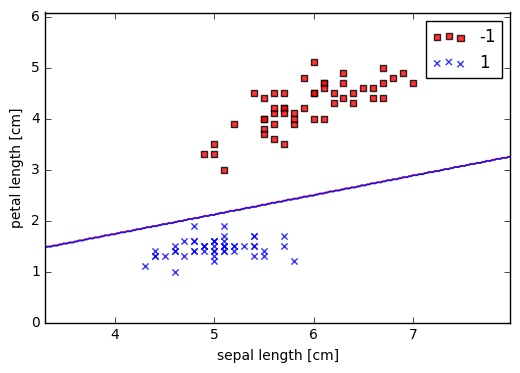

In [44]:
plot_decision_region(x,y,classifier=ppn)
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.legend(loc='upperleft')
plt.show()

In [45]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, train_size=0.8, random_state=1)

E:\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2010: FutureWarning: From version 0.21, test_size will always complement train_size unless both are specified.
  FutureWarning)


In [46]:
clf = Percetron(learning_rate=0.1, n_iter=10)
clf.fit(x_train, y_train)

In [51]:
100 * np.mean(clf.predict(x_test) == y_test)

100.0

E:\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.minimum.reduce will be axis=0, not the current None, to match np.minimum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)
E:\Anaconda3\lib\site-packages\numpy\ma\core.py:6385: MaskedArrayFutureWarning: In the future the default for ma.maximum.reduce will be axis=0, not the current None, to match np.maximum.reduce. Explicitly pass 0 or None to silence this warning.
  return self.reduce(a)


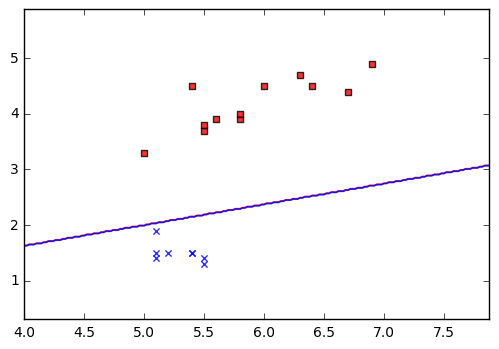

In [52]:
plot_decision_region(x_test, y_test, clf)

In [54]:
def loadDataSet_x(path):   #读取数据（这里只有两个特征）
    dataMat = []
    #labelMat = []
    fr = open(path)
    for line in fr.readlines():
        lineArr = line.strip().split()
        dataMat.append([1.0, float(lineArr[0]), float(lineArr[1]), float(lineArr[2])])   #前面的1，表示方程的常量。比如两个特征X1,X2，共需要三个参数，W1+W2*X1+W3*X2
        #labelMat.append(int(lineArr[2]))
    return dataMat
def loadDataSet_y(path):   #读取数据（这里只有两个特征）
    #dataMat = []
    labelMat = []
    fr = open(path)
    for line in fr.readlines():
        lineArr = line.strip().split()
        #dataMat.append([1.0, float(lineArr[0]), float(lineArr[1]), float(liArr[2])])   #前面的1，表示方程的常量。比如两个特征X1,X2，共需要三个参数，W1+W2*X1+W3*X2
        labelMat.append(int(lineArr[0]))
    return labelMat

titanic_file_path = './data/'
x = loadDataSet_x(titanic_file_path + 'titanic_train_data.asc')
y = loadDataSet_y(titanic_file_path + 'titanic_train_label.asc')
x_test = loadDataSet_x(titanic_file_path + 'titanic_test_data.asc')
y_test = loadDataSet_y(titanic_file_path + 'titanic_test_label.asc')

In [56]:
x_test = np.array(x_test)

In [58]:
x_test.shape

(10255, 4)

In [12]:
x_test = np.array(x_test)
clf = Percetron()
clf.fit(x_test, y_test)

In [13]:
y_pred = clf.predict(x)

In [14]:
count = 0.0
for i in range(len(y_pred)):
    if(y_pred[i] == y[i]):
        count += 1
count /= len(y_pred)
print(count)

0.792
